# Métodos e Modelos Avançados em Ciência de Dados

## Análise do comportamento da MLP

Algoritmo: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer 

In [19]:
# importando as biblitecas para manipulação dos dados, do scikit-learn e do dataset utilizado

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.datasets import load_breast_cancer

In [20]:
# a escolha do dataset breast_cancer se deve a familiaridade obtida através de trabalhos realizados anteriormente
# o dataset possui 30 características e a classe Diagnosis (0 = Malignant, 1 = Benign)

# carregando os dados do dataset
X, y = load_breast_cancer(return_X_y=True)

X.shape, y.shape

((569, 30), (569,))

In [21]:
# convertendo para um Dataframe e exibindo os primeiros registros
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
# dividindo e atribuindo os dados de treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0, 
    shuffle=True,
    stratify=y
)

# exibindo o resultado da divisão
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

In [23]:
# normalizando os dados de treino e teste
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [24]:
# foram definidos até 10 camadas ocultas e 10 sementes aleatórias
# 4 tipos de funções de ativação das camadas ocultas e 3 solucionadores de otimização de peso

# definindo os hiperparâmetros
params = [{
    "hidden_layer_sizes": np.arange(1, 10),
    "random_state": np.arange(10),
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"]
}]

In [31]:
# a escolha pelo MLPClassifier se deve a familiaridade com os algoritmos da bilbioteca scikit-learn
# o GridSearchCV foi utilizado para automatizar o processo de ajuste dos parâmetros do algoritmo MLPClassifier
# foi utilizada validação cruzada de 5 vezes, padrão do GridSearchCV

# criando o modelo
model = GridSearchCV(
    MLPClassifier( 
        solver='adam',
        max_iter=10000, 
        random_state=0
    ),
    params,
    cv=5,
    n_jobs=-1,
    verbose=10,
    return_train_score=True
)

In [32]:
# treinando o modelo
model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=10000, random_state=0),
             n_jobs=-1,
             param_grid=[{'activation': ['identity', 'logistic', 'tanh',
                                         'relu'],
                          'hidden_layer_sizes': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'random_state': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'solver': ['lbfgs', 'sgd', 'adam']}],
             return_train_score=True, verbose=10)

In [10]:
# exibindo os melhores hiperparâmetros
model.best_params_

{'activation': 'identity',
 'hidden_layer_sizes': 5,
 'random_state': 7,
 'solver': 'sgd'}

In [11]:
# exibindo o melhor resultado
model.best_score_

0.99

In [12]:
# verificando a acurácia dos dados de treino
y_train_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_train_pred).round(2)

0.99

In [13]:
# verificando a acurácia dos dados de teste
y_test_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_test_pred).round(2)

0.95

In [14]:
# atribuindo a matriz de confusão de treino e teste
cm_train = confusion_matrix(y_train, y_train_pred, normalize="true")
cm_test = confusion_matrix(y_test, y_test_pred, normalize="true")

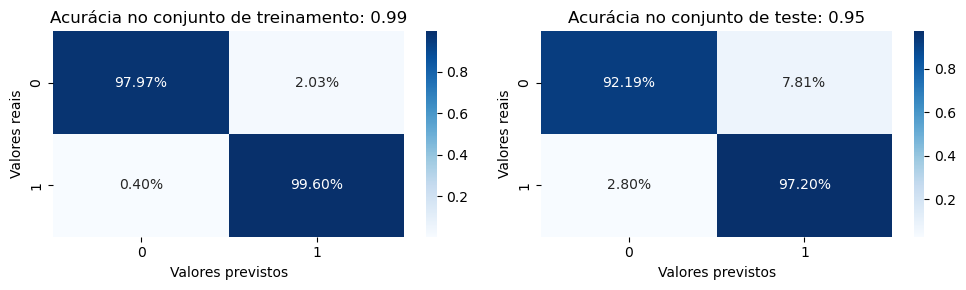

In [15]:
# exibindo os gráficos com a matriz de confusão de treino e teste
fig, ax = plt.subplots(1, 2, figsize=(10,3))

sns.heatmap(cm_train, annot=True, fmt=".2%", cmap="Blues", ax=ax[0])
ax[0].set_title("Acurácia no conjunto de treinamento: " + str(accuracy_score(y_train, y_train_pred).round(2)), size=12)
ax[0].set_xlabel("Valores previstos")
ax[0].set_ylabel("Valores reais")

sns.heatmap(cm_test, annot=True, fmt='.2%', cmap="Blues", ax=ax[1])
ax[1].set_title("Acurácia no conjunto de teste: " + str(accuracy_score(y_test, y_test_pred).round(2)), size=12)
ax[1].set_xlabel("Valores previstos")
ax[1].set_ylabel("Valores reais")

fig.tight_layout()

In [16]:
# exibindo relatório com as principais métricas de classificação de treino
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       148
           1       0.99      1.00      0.99       250

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



In [17]:
# exibindo relatório com as principais métricas de classificação de teste
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



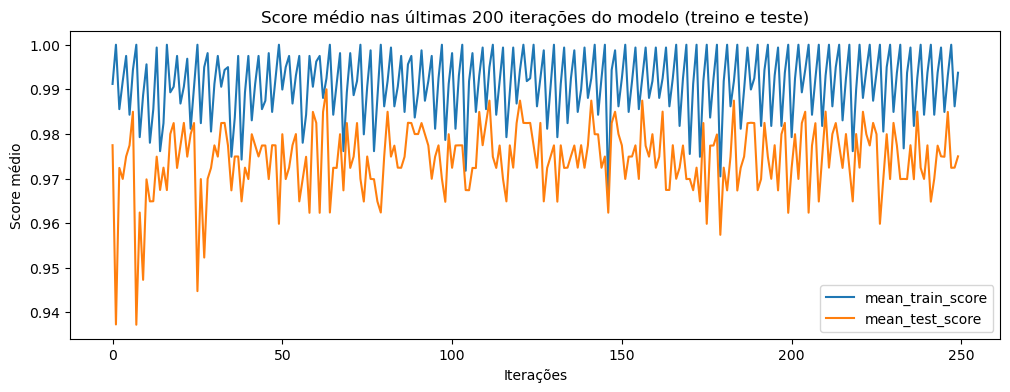

In [162]:
# visualizando os scores médios de treino e teste do modelo
mean_train_score = model.cv_results_["mean_train_score"]
mean_test_score = model.cv_results_["mean_test_score"]

fig = plt.subplots(figsize=(12,4))

plt.title("Score médio nas últimas 200 iterações do modelo (treino e teste)")
plt.xlabel("Iterações")
plt.ylabel("Score médio")
plt.plot(mean_train_score[-250:], label="mean_train_score")
plt.plot(mean_test_score[-250:], label="mean_test_score")

plt.legend()

### Considerações finais

O dataset breast_cancer possui poucos registros, mas para evitar que a execução do algoritmo demorasse muito, optou-se por um
número pequeno de hidden_layer_sizes e random_state, suficientes para um bom desempenho na execução e no resultado do algoritmo.

A utilização do GridSearchCV possibilitou ajustar de forma automatizada e encontrar os melhores hiperparâmetros para que o
algoritmo MLPClassifier tivesse uma acurácia de 0.99 sobre os dados de treinamento.

Alguns testes foram realizados com quantidades maiores de camadas ocultas (até 30) e sementes aleatórias (até 50), e aliados a 
quantidade de tipos de funções de ativação (4) e otimizadores de peso (3), a execução do algoritmo levou quase 1 hora para 
ser finalizada. Sem o GridSearchCV, a dificuldade de encontrar o melhor resultado e o tempo gasto com as tentativas, seria
muito maior.

Como melhoria futura nesta análise, pretende-se observar como se comporta o algoritmo em relação as percas em cada iteração,
através de estatísticas e gráficos.

De maneira geral, o MLPClassifier atendeu muito bem as expectativas, pois possui uma simples utilização e oferece vários
parâmetros e atributos que possibilitam uma ótima eficácia no resultado da classificação.